# Excerise 2
In this exercise you will explore the how hard it is to find the best balance between TPR and FPR. 

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Balancing TPR and FPR and interpretability of a classifier results given inbalance between classes
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e. the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only 1 in 10,000 people. 

1. What are the TPR and FPR of the chosen classifier in this case? Giving that there is a balance between the two --- is it a good point on the ROC curve? 

2. Why is it good news that the disease is rare? What are the chances that you actually have the disease?

3. Taking into account the previous answers, would you say the designer of the classifier made a good choice in this case?


In [1]:
# 99% accurate test
# TP = .99
# TN = .99
# p(disease) = 1/10000

#True positive rate (or sensitivity): TPR=TP/(TP+FN)
#False positive rate: FPR=FP/(FP+TN)


#### Answer 1 TPR and FPR : yes its a good point on the roc curve, at 99% y axis, 0.01 x axis
- tpr: .99 / (.99 + .01) = .99
- fpr: - .01 / (.01 + .99) = .01

#### Answer 2
It is good news that the disease is rare because if you are tested and you have it the chance that you have it is 99%


#### Answer 3
yes, in a disease you want a high true positive right and a low false positive rate

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model) and Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


In [4]:
import sklearn
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sklearn.datasets
 
sns.set(rc={"figure.figsize": (5, 5)})
sns.set_style("white")

In [5]:
# your code
mnist = sklearn.datasets.fetch_mldata('MNIST original')

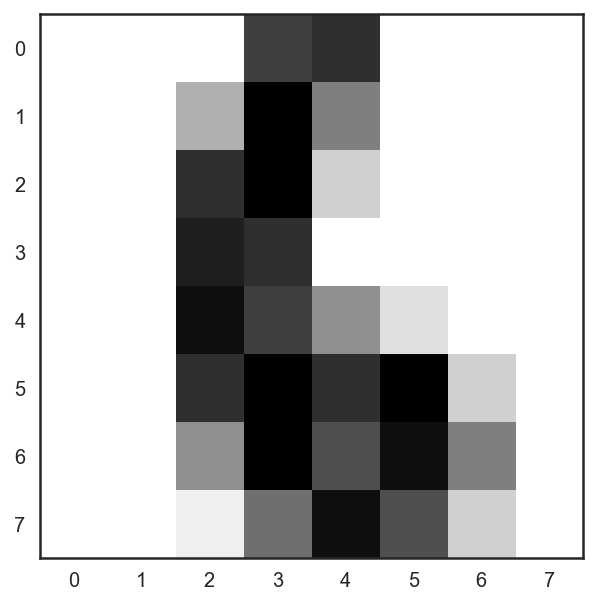

In [10]:
digits = sklearn.datasets.load_digits()
plt.imshow(digits.images[6],cmap =plt.cm.gray_r) 
#digits.images[0]
#plt.plot(mnist.data[3], marker = "o")


In [23]:
#Finally, divide your data into train and test sets, using 1/7 of the data for testing.
digits = mnist.data
target = mnist.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits, target, test_size = 0.143)

print x_train.shape, x_test.shape, y_train.shape, y_test.shape

(59990, 784) (10010, 784) (59990,) (10010,)


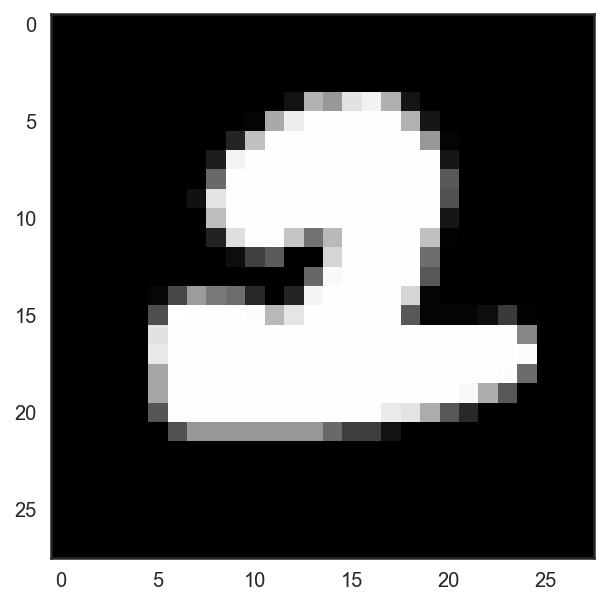

In [24]:
x_train[0].reshape((28, 28)).shape
plt.imshow(x_train[0].reshape((28, 28)), cmap = "gray")

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
Put you answer here...

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remeber, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attibute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...
1. code below
2. code below
3. a method to find the optimal threshold of binarization is to use differen't thresholds and see how the accuracy of the model changes, maybe with a diffren't threshold the model can characterize the digit more accurately and cross_validation

In [11]:
# code goes here
digits = mnist.data
target = mnist.target

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(digits, target, test_size = 0.143)


from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
clf.fit(X_train, y_train)

feature_log_prob = clf.feature_log_prob_

y_pred = clf.predict(X_test)

#confusion_matrix(X_test)

In [12]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.838461538462


             precision    recall  f1-score   support

          0       0.90      0.91      0.90       982
          1       0.95      0.89      0.92      1257
          2       0.82      0.86      0.84       898
          3       0.82      0.77      0.80      1089
          4       0.82      0.81      0.82       960
          5       0.71      0.82      0.76       755
          6       0.91      0.90      0.91      1016
          7       0.84      0.91      0.88       934
          8       0.77      0.77      0.77       990
          9       0.82      0.74      0.78      1129

avg / total       0.84      0.84      0.84     10010

total accuracy: 0.838461538462


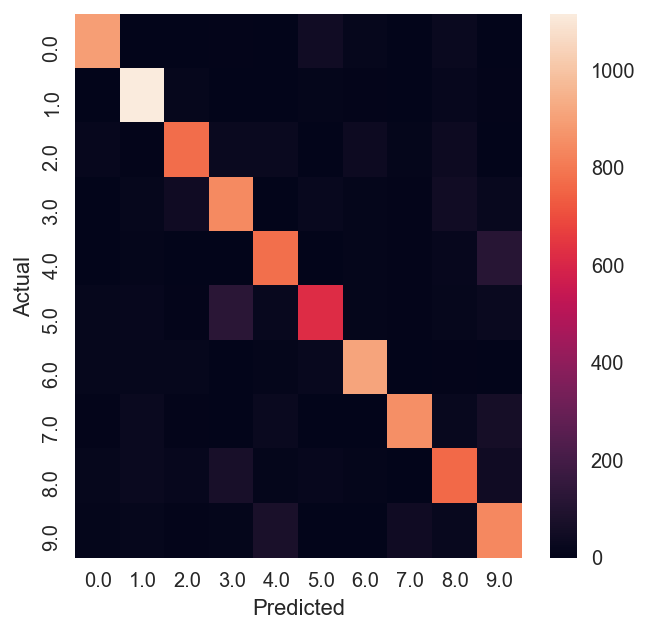

In [18]:
import pandas as pd
# y_test = pd.Series(y_test, name='Actual')
# y_pred = pd.Series(y_pred, name='Predicted')
# df_confusion = pd.crosstab(y_test, y_pred) #margins=True)
# print (df_confusion)

from sklearn.metrics import classification_report
classes = ["0","1","2","3","4","5","6","7","8","9"]
print (classification_report(y_pred, y_test, target_names=classes))
print ("total accuracy:", sklearn.metrics.accuracy_score(y_pred, y_test))


sns.heatmap(df_confusion)

### Multivariate Logistic Regression
We will now look at a discriminative model for this problem, specifically, the Multivariate Logistic Regression model. Again, we will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 3
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`.

1. As we did for the Naive Bayes classifier above, plot the confusion matrix of your classifier, as claculated on the test data, and calculate the total accuracy. Summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model, nor plot the "mean image".

#### Answer 3
Put you answer here...

/Users/Stav/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1018
          1       0.97      0.97      0.97      1177
          2       0.89      0.90      0.89       934
          3       0.89      0.91      0.90      1007
          4       0.94      0.91      0.92       979
          5       0.86      0.89      0.87       849
          6       0.97      0.94      0.95      1027
          7       0.92      0.94      0.93      1005
          8       0.86      0.86      0.86       987
          9       0.89      0.89      0.89      1027

avg / total       0.92      0.92      0.92     10010

total accuracy: 0.917982017982


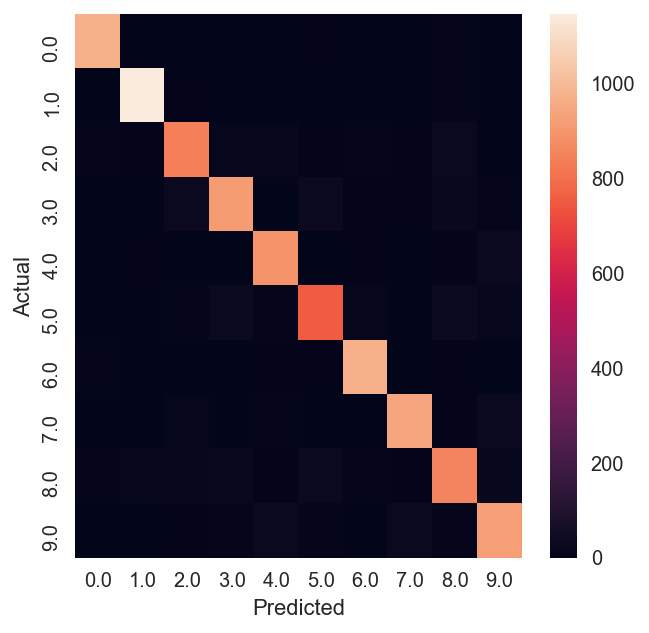

In [20]:
# code goes here

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver ="lbfgs")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

import pandas as pd
y_test = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_test, y_pred) #margins=True)
#print df_confusion
sns.heatmap(df_confusion)

print (classification_report(y_pred, y_test, target_names=classes))
print ("total accuracy:", sklearn.metrics.accuracy_score(y_pred, y_test))

## The NB classifier does a pretty good job of predicting the right classes, as we can see by the correlation matrix that indicates there is a high correlation between the actual class and the predicted class

In [81]:
# show where the predictions are not correct
y_test[y_test != y_pred].index

Int64Index([  12,   38,   72,   83,  107,  117,  171,  186,  208,  230,
            ...
            9907, 9913, 9916, 9928, 9935, 9945, 9981, 9984, 9994, 9997],
           dtype='int64', length=834)

real : 0.0
pred : 8.0


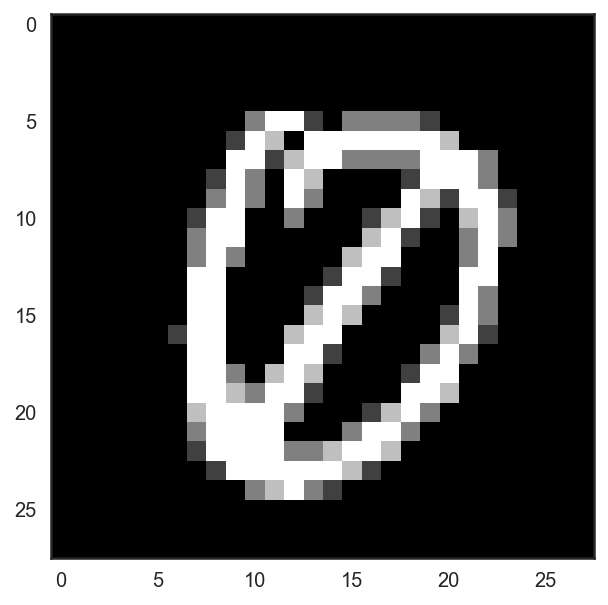

In [82]:
# plot misclassified class
print "real :" ,y_test[12]
print "pred :", y_pred[12]
plt.imshow(X_test[12].reshape((28, 28)), cmap = "gray")

In [77]:
# predict probabilities for each class
probs_x_12 = pd.DataFrame(pd.Series(clf.predict_proba(X_test[12].reshape(1,-1)).flatten())).reset_index()
probs_x_12.columns = ["class", "probability"]
probs_x_12

class   probability
0      0  1.221595e-02
1      1  5.314158e-07
2      2  6.763686e-03
3      3  2.190697e-05
4      4  1.957524e-06
5      5  2.326181e-04
6      6  5.722054e-08
7      7  6.418047e-05
8      8  9.804308e-01
9      9  2.682936e-04

## from the results we see that class 8 had the highest probability, 
## 0 was the next choice but because of these probabilities the classifier assumed the digit was an 8 instead of a 0